# Overview

Reference can be made to this [video](https://www.youtube.com/watch?v=WUx_9Cijssw) as overview.



## Image Processing

Just like the name suggests, "image processing" relates to processes and procedures e.g. **transformations** that are applied to an **input image** and an and the output returned as an **output image**. Transformations  could be  in the form of  sharpening, smoothing, contrasting etc. They all depend on the context or goal at the end.

In short  image processing mainly focusses  on processing raw images and preparing them for other tasks such as in Computer Vision.


## Computer Vision

Computer vision provides a broader spectrum compared to image processing. Here, a video  or image is  the input the end goal is to understand or  infer the image and its contents. It tries to do what the human brain does on e.g. images. Tasks  include segmentation, recognition, reconstruction e.g. from 2D to 3D  and prediction of say the type of cloud given several images labelled cloud types.


## Recent  Trends  in Computer Vision

![Computer Vision](https://miro.medium.com/max/1108/0*9um7ej7TQJXa117E) Image  adapted from https://bit.ly/35PEZQl


The above infographic gives an overview of the current  trends  in Computer Vision by areas based on the 2019 IEEE Conference on Computer Vision and Pattern Recognition (CVPR) paper submissions. **Deep learning**  in Computer Vision is depicted as the area still receiving  lots of research in addition to **Recognition**. The  two areas might be interlinked to a large extent. Aplication wise, computer vision is king in sports, transport, medical imaging analytics etc.

In [ ]:
#Google Colab Specific
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%ls

drive/  sample_data/


In [ ]:
#Navigate to your working directory in Google  Drive. This process is specific to Google Colab
%cd drive

/content/drive


In [ ]:
%cd My Drive/Torrens/Computer Vision

/content/drive/My Drive/Torrens/Computer Vision


# Introduction to OpenCV

In [ ]:
!sudo apt-get install python-opencv

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  python-opencv
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 535 kB of archives.
After this operation, 2,944 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 python-opencv amd64 3.2.0+dfsg-4ubuntu0.1 [535 kB]
Fetched 535 kB in 1s (438 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package python-opencv.
(Reading database ..

In [ ]:
#Just in case you need them installed manually. The above cell will take of  this so  is optional.
# !sudo apt-get install libpng-dev
# !sudo apt-get install libjpeg-dev
# !sudo apt-get install libopenexr-dev
# !sudo apt-get install libtiff-dev
# !sudo apt-get install libwebp-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libpng-dev is already the newest version (1.6.34-1ubuntu0.18.04.2).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libjpeg-dev is already the newest version (8c-2ubuntu8).
libjpeg-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopenexr-dev is already the newest version (2.2.0-11.1ubuntu1.1).
libopenexr-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtiff-dev is already the newest version (4.0.9-5ubuntu0.3).
libtiff-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 25

In [ ]:
import numpy as np #import numpy
import cv2 as cv #import  openCV
from matplotlib import pyplot as plt

print(cv.__version__)

4.1.2


## Selecting Pixels

Pixel values of  an image can be accessed  by row and column coordinates.
For RGB image, it returns an array of Red, Green and Blue values. Image intensity is returned for  gray scale images.



In [ ]:
image1 = cv.imread('images/torrens.jpg') #Outputs the image as it is
image2 = cv.imread('images/torrens.jpg',0) #Outputs a GrayScale image of the  original image above

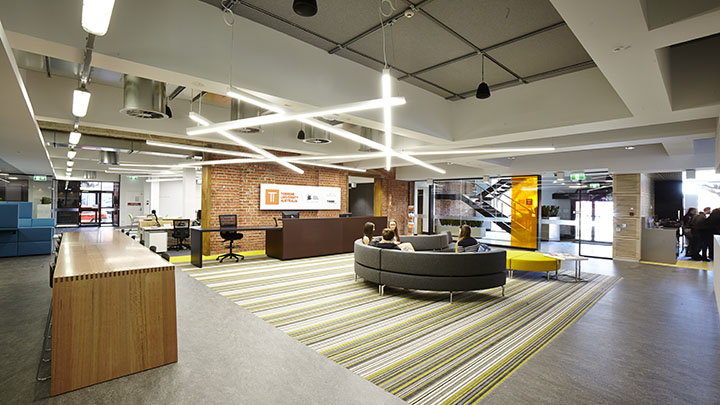

In [ ]:
## This is  specific to Google Colab
from google.colab.patches import cv2_imshow
cv2_imshow(image1) #Coloured image

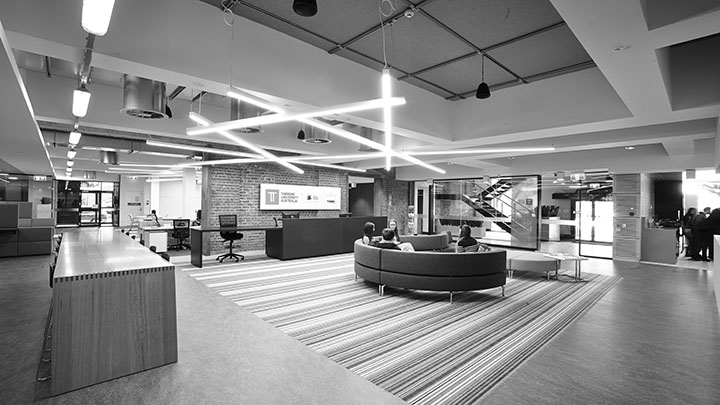

In [ ]:
cv2_imshow(image2)  #Grayscale image

In [ ]:
#image properties
print( image1.shape) #Returns a tuple of the number of rows, columns, and channels as its a coloured image

(405, 720, 3)


In [ ]:
#image properties
print( image2.shape ) # Returned tuple contains only the number of rows and columns as its a grayscale image. Good way to check the image type

(405, 720)


In [ ]:
px = image1[100,100]
print(px)

[104 127 135]


## Processing Colours

Referencing of different colour conversion codes can be  found [here](https://docs.opencv.org/master/d8/d01/group__imgproc__color__conversions.html
)

In [ ]:
#cvtColor converts an image from one color space to another.
image_rgb = cv.cvtColor(image1, cv.COLOR_BGR2RGB)
cv2_imshow(image_rgb)

## Histograms of  Pixels
**cv2.calcHist()** function is used to find the  histogram of  images. Its parameters are as below:-

cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])

```
1. Images : it is the source image of type uint8 or float32. Has to be in square brackets, i.e. “[image2]”.

2. Channels : It is the index of channel for which we compute the histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0],[1] or [2] to calculate histogram of blue,green or red channel respectively. Has to be  in square brackets.

3. Mask : To find histogram of full image, the value is left as “None”. But if you want to find histogram of particular region of the image, you have to create a mask image for that and give it as mask.

4. HistSize : this represents our BIN count which represents a certain intensity value range. Need to be given in square brackets. For full scale, we pass [256].

5. Ranges : Normally given as [0,256].
```






In [ ]:
#Use matplotlib to find the image histogram
# plt.hist(image1.ravel(),256,[0,256]); #colour image
# plt.show()
color = ['b','g','r']
for i,col in enumerate(color):
    histogram = cv.calcHist([image1],[i],None,[256],[0,256])
    plt.plot(histogram,color = col)
    plt.xlim([0,256])
plt.show()

Red apparently has some  high value  areas in the coloured image

## Transforming  Images

### Scaling

Scaling is just resizing of the image.

Expanded Image


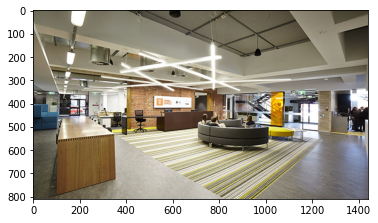

Shrunk Image


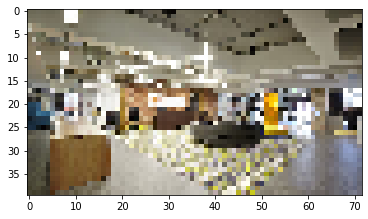

In [ ]:
# Expanding
print("Expanded Image")
res = cv.resize(image_rgb, None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)
plt.imshow(res)
plt.show()

# Shrinking
print("Shrunk Image")
res = cv.resize(image_rgb, None,fx=.1, fy=.1, interpolation = cv.INTER_CUBIC)
plt.imshow(res)
plt.show()

### Translation
Translation shifts the  object’s location. If you know the shift in the $(x,y)$ direction and let it be $(t_x,t_y)$. A transformation matrix $M$ is represented as follows:

 $$\begin{bmatrix} 1 & 2 & t_x \\ 3 & 0 & t_y \end{bmatrix}$$


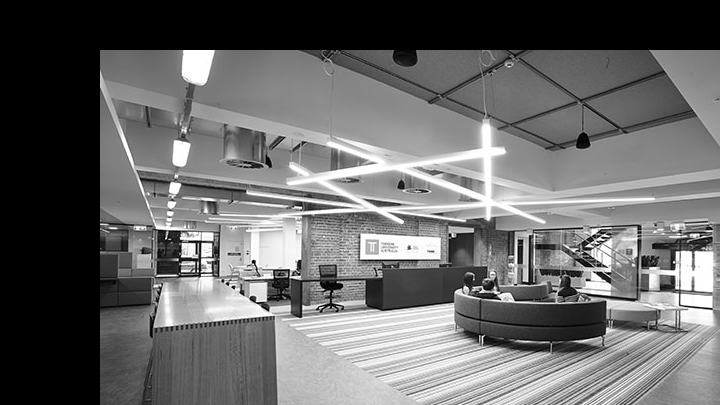

In [ ]:
rows,cols = image2.shape # for grayscale image

M = np.float32([[1,0,100],[0,1,50]])
dst = cv.warpAffine(image2,M,(cols,rows))
cv2_imshow(dst)

### Rotation
OpenCV provides a function, cv.getRotationMatrix2D for rotating an image

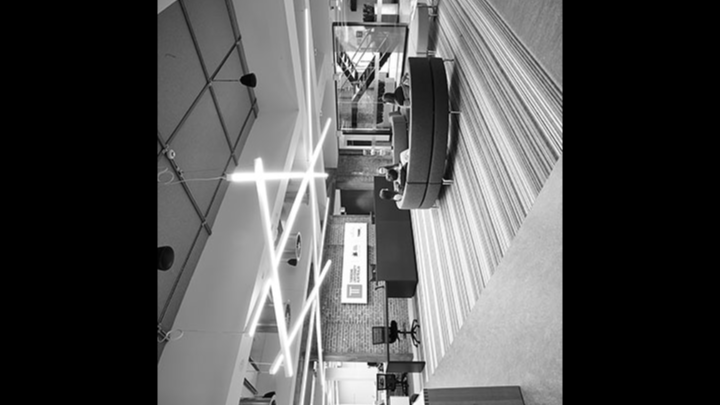

In [ ]:
rows,cols = image2.shape # for grayscale image

M = cv.getRotationMatrix2D((cols/2,rows/2),90,1) # rotates the image by 90 degree with respect to center without any scaling.
dst = cv.warpAffine(image2,M,(cols,rows))
cv2_imshow(dst)

### Affine Transformation

Here, all parallel lines in the original image will still be parallel in the output image. Then cv2.getAffineTransform will create a 2x3 matrix which is to be passed to cv2.warpAffine as 3 points will be needed from the input image and their corresponding  locations in the output image.

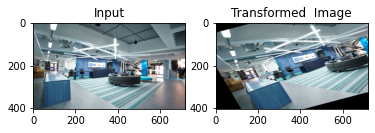

In [ ]:
rows,cols,ch = image1.shape

pointsA = np.float32([[50,50],[200,50],[50,200]]) #points on the input image
pointsB = np.float32([[10,100],[200,50],[100,250]])#points on the output image
M = cv.getAffineTransform(pointsA,pointsB)

dst = cv.warpAffine(image1,M,(cols,rows))

plt.subplot(121),plt.imshow(image1),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Transformed  Image')
plt.show()


### Perspective  Transformation
For perspective transformation, you need a 3x3 transformation matrix. Straight lines will remain straight even after the transformation. To get the transformation matrix, 4 points  on the input and output images. Among these 4 points, 3 of them should not be collinear.  **cv2.getPerspectiveTransform** function gets the transformation matrix. **cv2.warpPerspective** function with this 3x3 transformation matrix is then applied.

In [ ]:
rows,cols,ch = image1.shape

pointsA = np.float32([[56,65],[368,52],[28,387],[389,390]])
pointsB = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv.getPerspectiveTransform(pointsA,pointsB)

dst = cv.warpPerspective(image1,M,(300,300))

plt.subplot(121),plt.imshow(image1),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Transformed Image')
plt.show()

## Extracting Contours

Contours are curves that join all the continuous points (along the boundary), having same color or intensity. Theya are useful  for object detection and recognition as well as shape anaylysis.

**Points to Note: -**

```
1. For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.
2. findContours function modifies the source image.
3. In OpenCV, finding contours is like finding white object from black background. So remember, object to be found should be white and background should be black.
```
More information found [here](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html#contours-getting-started)

In [ ]:
imgray = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)  #conversion of image to grayscale
ret,thresh = cv.threshold(imgray,127,255,0)
contours, hierarchy = cv.findContours(thresh,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
img = cv.drawContours(imgray, contours, -1, (0,255,0), 3)
cv2_imshow(img)

## Detecting Interest Points







### Detecting corners in an image

Corners on an image are regions  with large variation in intensity in all the directions.  We'll be  using the  **cv2.cornerHarris** suggested by Chris Harris  and  Mike Stephens. Their paper is [here](http://www.bmva.org/bmvc/1988/avc-88-023.pdf). The function has the following arguments:-

**img** - Input image, it should be *grayscale* and *float32* type.

**blockSize** - It is the size of neighbourhood considered for corner detection

**ksize** - Aperture parameter of Sobel derivative used.

**k** - Harris detector free parameter in the equation.


In [ ]:
imgray_2 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)
imgray_2 = np.float32(imgray_2)
dst = cv.cornerHarris(imgray_2,2,3,0.04)
dst = cv.dilate(dst,None) #result is dilated for marking the corners, not important
cv2_imshow(imgray_2) #specific to Gogole Colab

Somehow, it works. Can be  further tweaked on images with well defined corners.

# Haar-Cascades and Face Recognition

This is  a simple  method  for detection of a **face** in an image. Therefore, its able to differentiate a a face region in an image. OpenCV comes with a trainer as well as detector. This makes it possible to train your own classifier for any other objects  of interest e.g. cars.

OpenCV contains many pre-trained classifiers for face, eyes, smile etc. Those XML files are stored in **opencv/data/haarcascades/** folder. We'll need an image with a face and eyes for detection.





In [ ]:
!wget "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml" -O haarcascade_frontalface_default.xml
!wget "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml" -O haarcascade_eye.xml
#can still be  added but not for now. You can practice with them on your own
# !wget "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye_tree_eyeglasses.xml" -O haarcascade_eye_tree_eyeglasses.xml
# !wget "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_smile.xml" -O haarcascade_smile.xml

--2020-04-23 09:23:25--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.05s   

2020-04-23 09:23:26 (18.9 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]

--2020-04-23 09:23:27--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.


In [ ]:
image4 = cv.imread('images/Torrens-Uni-hospitality.jpg') #image with at least a face and eyes
image5 = cv.imread('images/torrens2.jpg')

face_cascade_file = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade_file = cv.CascadeClassifier('haarcascade_eye.xml')
gray_scaled_image4 = cv.cvtColor(image4, cv.COLOR_BGR2GRAY)
gray_scaled_image5 = cv.cvtColor(image5, cv.COLOR_BGR2GRAY)

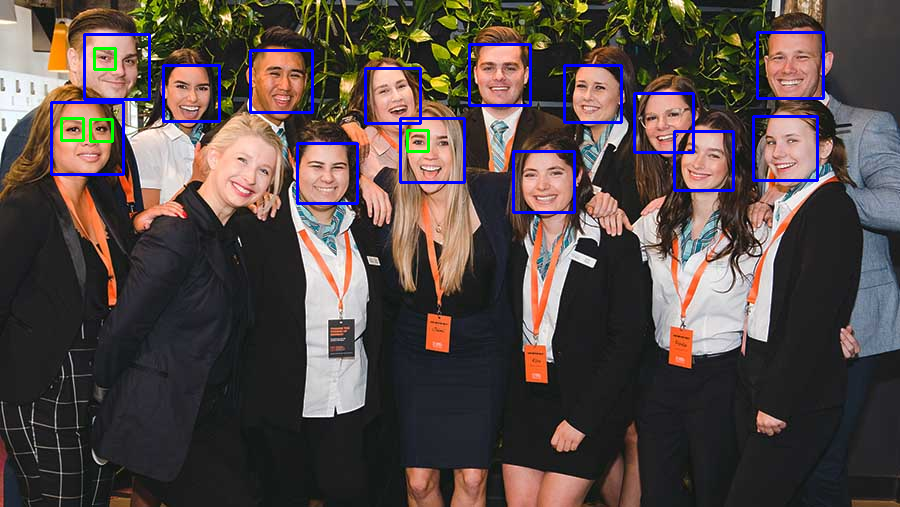

In [ ]:
faces_image4 = face_cascade_file.detectMultiScale(gray_scaled_image4, 1.3, 5)
for (x,y,w,h) in faces_image4:
    image4 = cv.rectangle(image4,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray_scaled_image4[y:y+h, x:x+w]
    roi_color = image4[y:y+h, x:x+w]
    eyes = eye_cascade_file.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2_imshow(image4)

Classifier misses one face  here


In [ ]:
faces_image5 = face_cascade_file.detectMultiScale(gray_scaled_image5, 1.3, 5)
for (x,y,w,h) in faces_image5:
    image5 = cv.rectangle(image5,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray_scaled_image5[y:y+h, x:x+w]
    roi_color = image5[y:y+h, x:x+w]
    eyes = eye_cascade_file.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2_imshow(image5)

All faces captured but eyes for two people not captured. Glasses file would  have worked better here.

# Object Detection and Tracking  

## Object Detection



In [ ]:
!pip install cvlib #A simple, high level, easy to use, open source computer vision library for python

In [ ]:
#CVlib uses YOLOv3 model trained on COCO dataset capable of detecting 80 common objects in context.
import cvlib as cvlib
from cvlib.object_detection import draw_bbox


In [ ]:
#Load  an image
im = cv.imread('images/banana_apple.jpeg') #Credit for the image: Alexander Raths/Shutterstock
im2 = cv.imread('images/Torrens-Uni-hospitality.jpg') #Photo having  male and female faces. Lets  see whether we can detect gender


In [ ]:
bbox, label, conf = cvlib.detect_common_objects(im)
output_image = draw_bbox(im, bbox, label, conf)
plt.imshow(output_image)
plt.show()

Detected a banana and  apples. Good model.

## You Only Look Once (YOLO) for  Object Tracking  

You only look once (YOLO) is a state-of-the-art, real-time object detection system developed by Joseph Redmon. From the author's [paper](https://arxiv.org/abs/1506.02640), object detection is  framed as a regression problem to spatially separated bounding boxes and associated class probabilities. A single neural network predicts bounding boxes and class probabilities directly from full images in one evaluation.  


In [ ]:
# Making use of Google Colabs GPU comes in handy here

!nvidia-smi #Tells you whether GPU is  running on notas it  checks teh Nvidia  driver. Change it under Edit-->Notebook Settings---> Choose GPU instead of None for hardware accelerator

Thu Apr 23 10:10:46 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    31W / 250W |    267MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
%ls

'Computer Vision.ipynb'   grayscaleimg.jpg                      images/
 darknet/                 haarcascade_eye.xml                   torrens.jpg
'darknet (1)'/            haarcascade_frontalface_default.xml


In [ ]:
#clone darknet repository
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet/

Cloning into 'darknet'...
remote: Enumerating objects: 13139, done.
remote: Total 13139 (delta 0), reused 0 (delta 0), pack-reused 13139
Receiving objects: 100% (13139/13139), 11.88 MiB | 7.33 MiB/s, done.
Resolving deltas: 100% (8985/8985), done.
Checking out files: 100% (1993/1993), done.


In [ ]:
!apt install gcc-5 g++-5 -y
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cpp-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0 libstdc++-5-dev
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg libasan2-dbg
  liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg
  libquadmath0-dbg libstdc++-5-doc
The following NEW packages will be installed:
  cpp-5 g++-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
0 upgraded, 9 newly installed, 0 to remove and 25 not upgraded.
Need to get 29.1 MB of archives.
After this operation, 100 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 gcc-5-base amd64 5.5.0-12ubuntu1 [17.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libisl15 amd64 0.18-4 [548 kB]
Get:3 http://arch

In [ ]:
%cd darknet

/content/drive/My Drive/Torrens/Computer Vision/darknet


In [ ]:
# Leverage  GPU and  OpenCV power
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-Wunused-variable]
     int it_tb_res = cv::create

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights
!chmod a+x ./darknet

--2020-04-23 10:14:07--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   336KB/s    in 32m 24s 

2020-04-23 10:46:33 (125 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
!apt install ffmpeg libopencv-dev libgtk-3-dev python-numpy python3-numpy libdc1394-22 libdc1394-22-dev libjpeg-dev libtiff5-dev libavcodec-dev libavformat-dev libswscale-dev libxine2-dev libgstreamer1.0-dev libgstreamer-plugins-base1.0-dev libv4l-dev libtbb-dev qtbase5-dev libfaac-dev libmp3lame-dev libopencore-amrnb-dev libopencore-amrwb-dev libtheora-dev libvorbis-dev libxvidcore-dev x264 v4l-utils unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libjpeg-dev is already the newest version (8c-2ubuntu8).
libjpeg-dev set to manually installed.
libvorbis-dev is already the newest version (1.3.5-4.2).
libvorbis-dev set to manually installed.
python-numpy is already the newest version (1:1.13.3-2ubuntu1).
python-numpy set to manually installed.
python3-numpy is already the newest version (1:1.13.3-2ubuntu1).
python3-numpy set to manually installed.
unzip is already the newest version (6.0-21ubuntu1).
libdc1394-22 is already the newest version (2.2.5-1).
libdc1394-22 set to manually installed.
libdc1394-22-dev is already the newest version (2.2.5-1).
libdc1394-22-dev set to manually installed.
libtbb-dev is already the newest version (2017~U7-8).
libtbb-dev set to manually installed.
libtiff5-dev is already the newest version (4.0.9-5ubuntu0.3).
libtiff5-dev set to manually installed.
qtbase5-dev is already the newest version (5.9.5+dfsg-0u

In [ ]:
#Input an image
from google.colab import files
uploaded = files.upload() #Upload widget is only available when the cell has been executed in the current browser session. Rerun in case it doesnt  work straightaway


Saving dog.mp4 to dog.mp4


In [ ]:
#Good to check whether you are in the same working directory
!pwd
%ls #list all files in the directory. "dog.mp4" is my video file. Yours will/should be different.

/content/drive/My Drive/Torrens/Computer Vision/darknet
3rdparty/     CMakeLists.txt          image_yolov3.sh*        results/
appveyor.yml  darknet*                include/                scripts/
backup/       DarknetConfig.cmake.in  json_mjpeg_streams.sh*  src/
build/        darknet.py              LICENSE                 video_v2.sh*
build.ps1     darknet_video.py        Makefile                video_yolov3.sh*
build.sh*     data/                   net_cam_v3.sh*          yolov3.weights
cfg/          dog.mp4                 obj/
cmake/        image_yolov2.sh*        README.md


In [ ]:
 %ls

3rdparty/     CMakeLists.txt          image_yolov3.sh*        results/
appveyor.yml  darknet*                include/                scripts/
backup/       DarknetConfig.cmake.in  json_mjpeg_streams.sh*  src/
build/        darknet.py              LICENSE                 video_v2.sh*
build.ps1     darknet_video.py        Makefile                video_yolov3.sh*
build.sh*     data/                   net_cam_v3.sh*          yolov3.weights
cfg/          dog.mp4                 obj/
cmake/        image_yolov2.sh*        README.md


In [ ]:
#This training will take quite sometime. Grab a coffee and relax. Make use of  your GPU quota on Google Colab
!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show dog.mp4 -i 0 -out_filename output.avi -thresh 0.7

 CUDA-version: 10010 (10010), GPU count: 1  
 OpenCV version: 3.2.0
Demo
 compute_capability = 600, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x

# Exercise

## Image Processing Task

Select an image of your own and copy it  in the working directory. The image should  have well defined lines. For example photo of a tarmacked road will be great. Using the Hough transform algorithm, find and plot  the output of lines in the image.



Record a video using your  phone. Make it short to maintain a reasonable size and  make sure that you capture more than three moving obects. You can use free online  video reducing web applications to reduce the size. Using YOLO for  Object Tracking, train the video on the model and  save the output predicted  outputs on the  video as a video file. Play the output and look carefully assess the captured labels. Are they accurate as per your intuition?